# *Churn Prédection avec machine learning*

## **1. Loading libraries and data**

In [42]:
# Imporation des bibliothèques
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Chargement des données
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv').set_index('customerID')
# Affichage des 10 premières lignes du DataFrame
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [44]:
# Afficher les colonnes du DataFrame
print(data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [45]:
# Voir les informations sur le DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

- `Interprétation :`
    - D'ici en peut conclure qu'on a pas des valeur manquantes dans notre dataset mais en doit véfier cela et voir et ce qu'il ya des duplication au non 
    - On peut voir aussi la variable **TotalCharge** avec type object en doit changer sont type en float

## **2. EDA**

In [46]:
# Changer le type de la colonne 'TotalCharges' en float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [47]:
# Vérifier les valeurs manquantes
print(f'Nombre de valeurs manquantes : {data.isnull().sum().sum()}')
# Vérifier les valeurs dupliquées
print(f'Nombre de valeurs dupliquées : {data.duplicated().sum()}') 

Nombre de valeurs manquantes : 11
Nombre de valeurs dupliquées : 22


- Le dataset contient 7043 entrées et 20 colonnes, avec des variables catégoriques et numériques.
- **Aucune valeur manquante** n’a été détectée à l’exception de la colonne `TotalCharges`, corrigée par interpolation linéaire (`data['TotalCharges'].interpolate(method='linear')`). Cela garantit l'intégrité des données pour l'analyse.
- **Suppression des doublons** et des colonnes inutiles (`customerID`) pour éviter les biais et réduire la dimensionnalité.

In [48]:
# Interpoler les valeurs manquantes de la colonne 'TotalCharges'
data['TotalCharges'] = data['TotalCharges'].interpolate(method='linear')

# Vérifier s'il reste des valeurs nulles
print(f"Valeurs nulles restantes dans 'TotalCharges' : {data['TotalCharges'].isnull().sum()}")

Valeurs nulles restantes dans 'TotalCharges' : 0


In [49]:
# Suppression des colonnes inutiles et des doublons
df = data.reset_index().copy()
df.drop(columns=['customerID'], inplace=True)
df.drop_duplicates(inplace=True)
# Vérification des valeurs manquantes après nettoyage  
print(f'Nombre de valeurs manquantes après nettoyage : {df.isnull().sum().sum()}')
# Vérification des valeurs dupliquées après nettoyage   
print(f'Nombre de valeurs dupliquées après nettoyage : {df.duplicated().sum()}')

Nombre de valeurs manquantes après nettoyage : 0
Nombre de valeurs dupliquées après nettoyage : 0


- Les doublons ont été supprimés, et les colonnes inutiles comme `customerID` ont été retirées.

In [50]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2290.560006
std,0.368947,24.534965,30.069001,2266.124410
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.250000
50%,0.000000,29.000000,70.400000,1405.300000
75%,0.000000,55.000000,89.900000,3807.350000
max,1.000000,72.000000,118.750000,8684.800000


In [51]:
df.describe(include='object').T

,count,unique,top,freq
gender,7021,2,Male,3541
Partner,7021,2,No,3619
Dependents,7021,2,No,4911
PhoneService,7021,2,Yes,6339
MultipleLines,7021,3,No,3368
InternetService,7021,3,Fiber optic,3090
OnlineSecurity,7021,3,No,3490
OnlineBackup,7021,3,No,3080
DeviceProtection,7021,3,No,3087
TechSupport,7021,3,No,3465


Churn
No     73.550776
Yes    26.449224
Name: proportion, dtype: float64


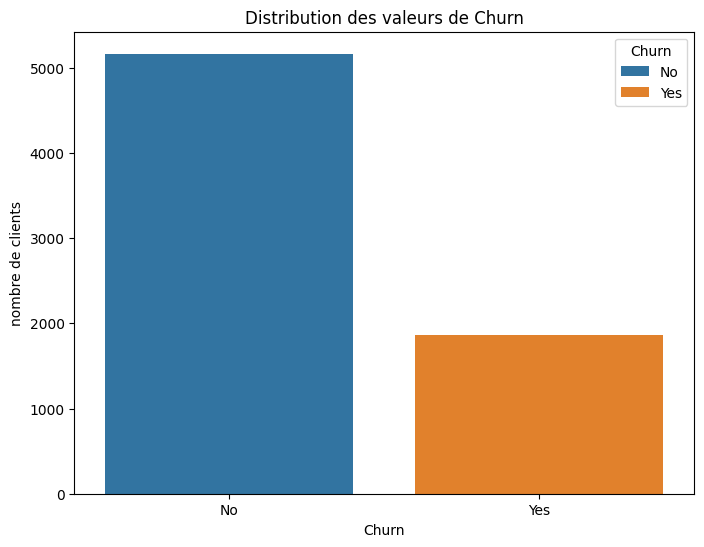

In [52]:
print(df['Churn'].value_counts(normalize=True)*100 )
# Visualisation de la distribution des valeurs de 'Churn'
plt.figure(figsize=(8, 6)) # Taille de la figure
sns.countplot(x='Churn', data=df, hue='Churn' , legend=True) # Compte des valeurs de 'Churn'
plt.title('Distribution des valeurs de Churn') # Titre du graphique
plt.xlabel('Churn') # Label de l'axe des x
plt.ylabel('nombre de clients') # Label de l'axe des y
plt.legend(title='Churn', loc='upper right') # Légende du graphique
plt.show() # Affichage de la distribution des valeurs de 'Churn'

- **Churn Distribution** : Environ 26% des clients ont quitté l'entreprise, ce qui indique un déséquilibre des classes.


Demographic Analysis:


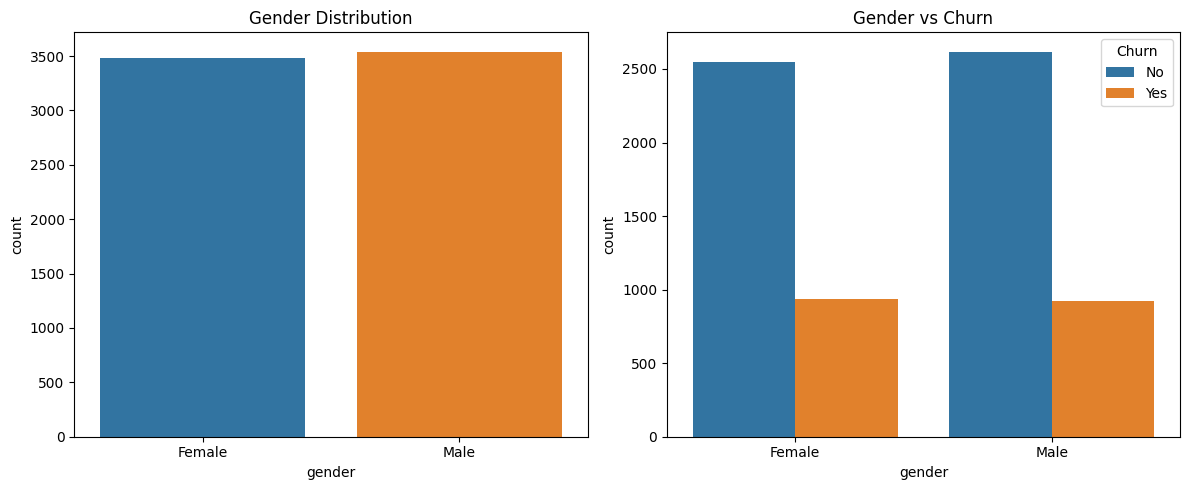

In [53]:
# Demographic Analysis
print("\nDemographic Analysis:")

# Gender and Churn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=df , hue='gender')
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender vs Churn')
plt.tight_layout()
plt.show()

- **Variables démographiques** : Les taux de churn sont similaires entre hommes et femmes, mais les clients sans partenaire ou sans dépendant présentent un taux de churn significativement plus élevé (cf. visualisations par `Partner` et `Dependents`). Cela suggère que l’isolement social pourrait influencer la fidélité.


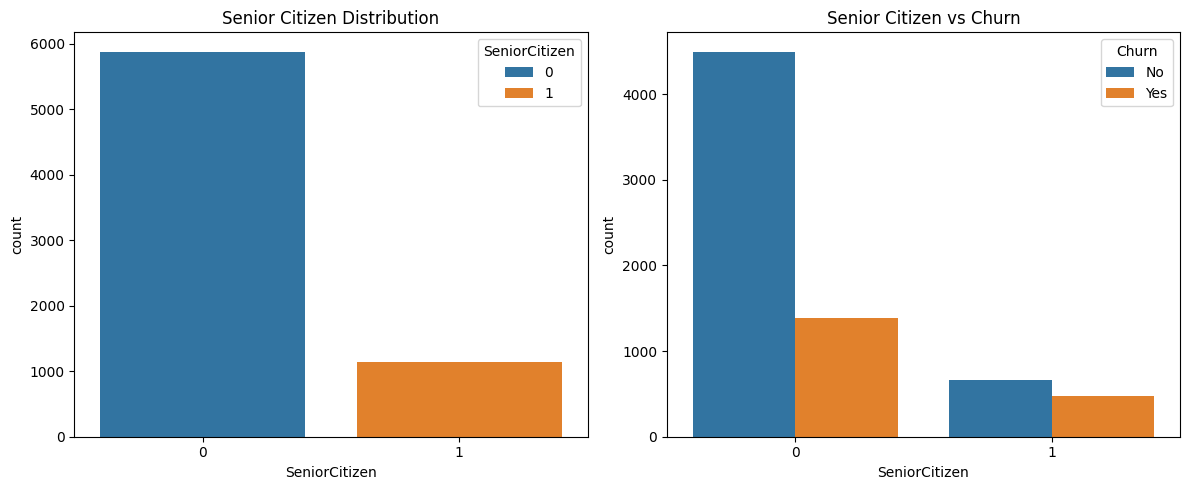

In [54]:
# Senior Citizen and Churn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='SeniorCitizen', data=df , hue='SeniorCitizen')
plt.title('Senior Citizen Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Senior Citizen vs Churn')
plt.tight_layout()
plt.show()

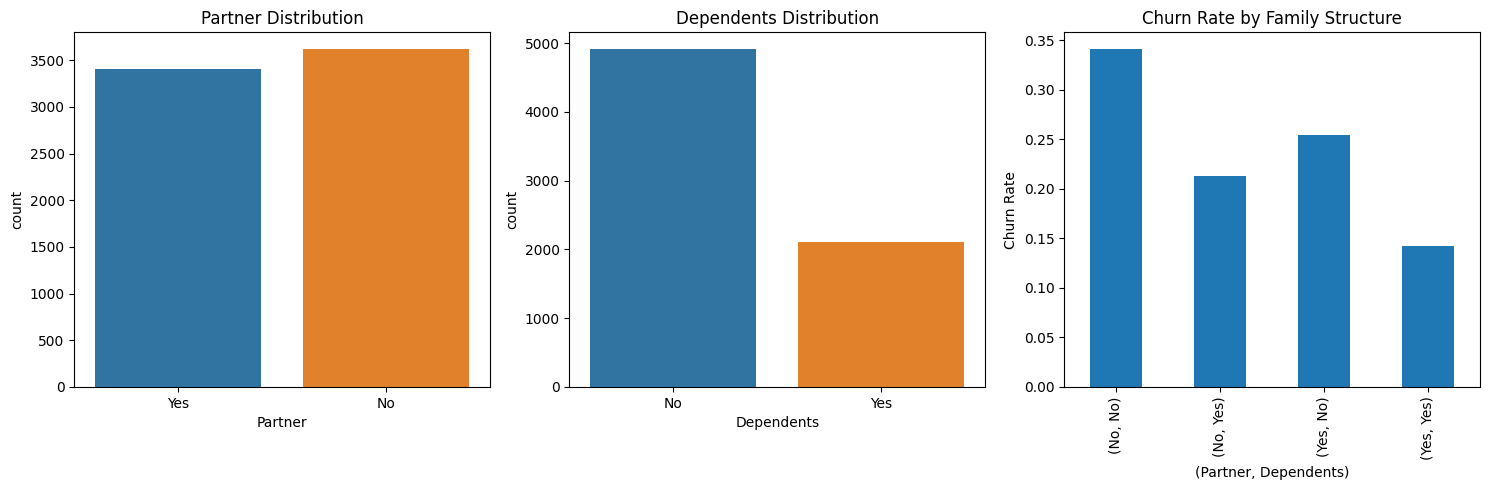

In [55]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Partner', data=df , hue='Partner')
plt.title('Partner Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='Dependents', data=df , hue='Dependents')
plt.title('Dependents Distribution')

plt.subplot(1, 3, 3)
partner_dependents = df.groupby(['Partner', 'Dependents'])['Churn'].value_counts(normalize=True).unstack()
partner_dependents['Yes'].plot(kind='bar')
plt.title('Churn Rate by Family Structure')
plt.xlabel('(Partner, Dependents)')
plt.ylabel('Churn Rate')
plt.tight_layout()
plt.show()

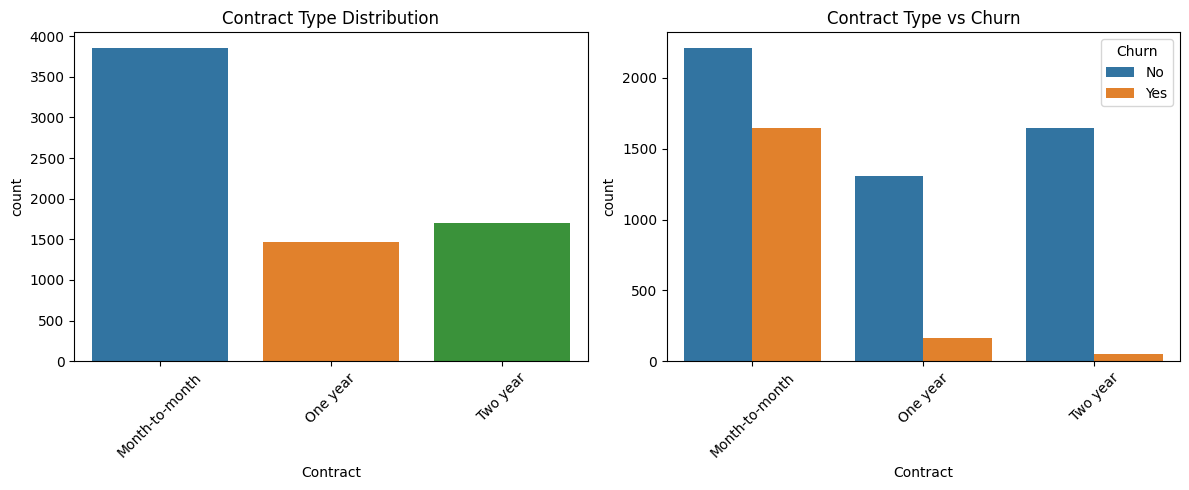

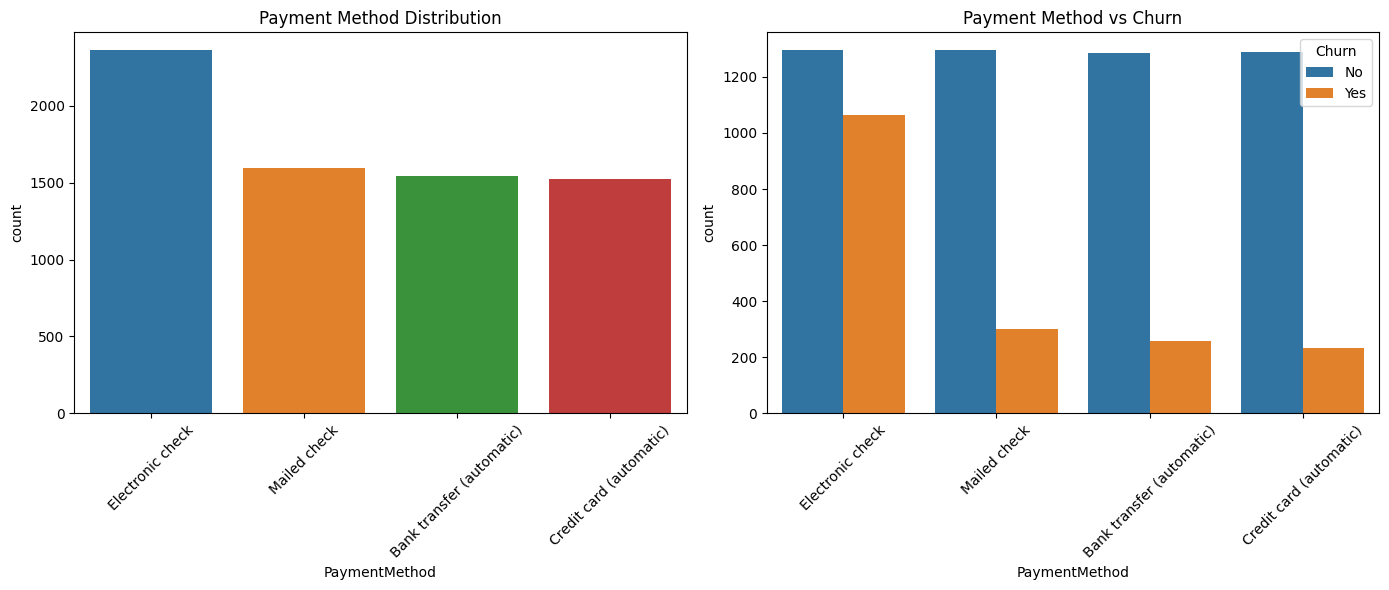

In [56]:
#Contract Type and Churn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Contract', data=df , hue='Contract')
plt.title('Contract Type Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Payment Method and Churn
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='PaymentMethod', data=df , hue='PaymentMethod')
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Payment Method vs Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Type de contrat** : Les contrats mensuels sont associés à un churn beaucoup plus élevé que les contrats annuels ou biannuels, probablement en raison de la flexibilité offerte aux clients pour résilier à tout moment.
- **Méthode de paiement** : Les clients utilisant des paiements électroniques (notamment les chèques électroniques) sont plus enclins à quitter l’entreprise, ce qui peut refléter une population moins engagée ou plus sensible aux changements.

In [57]:
# Catégorisation de colonnes 'tenure'
def convert_to_buckets(tenure):
    if tenure <= 24:
        return '0-24 months'
    elif tenure <= 36:
        return '25-36 months'
    elif tenure <= 48:
        return '37-48 months'
    elif tenure <= 60:
        return '49-60 months'
    else:
        return '61+ months'

In [58]:
df['tenure'] = df['tenure'].apply(convert_to_buckets) # Appliquer la fonction de conversion à la colonne 'tenure'
df['tenure'].value_counts() # Afficher la distribution des valeurs de 'tenure'

tenure
0-24 months     3188
61+ months      1407
25-36 months     832
49-60 months     832
37-48 months     762
Name: count, dtype: int64

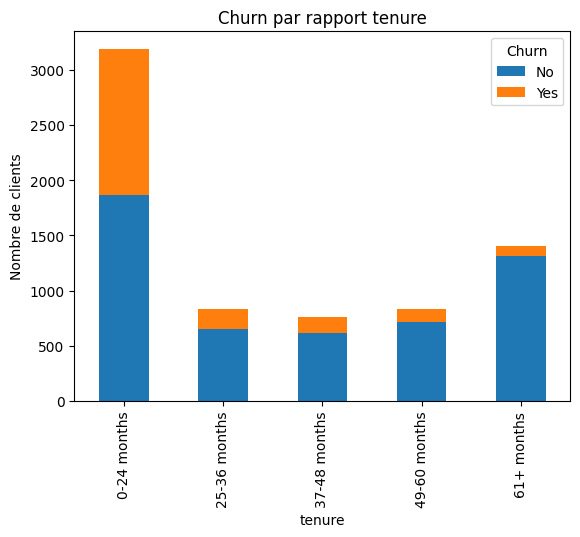

In [59]:
# Afficher la distribution des valeurs de 'tenure' par rapport à 'Churn'
df.groupby(['tenure','Churn']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Churn par rapport tenure')
plt.xlabel('tenure')
plt.ylabel('Nombre de clients')
plt.show()

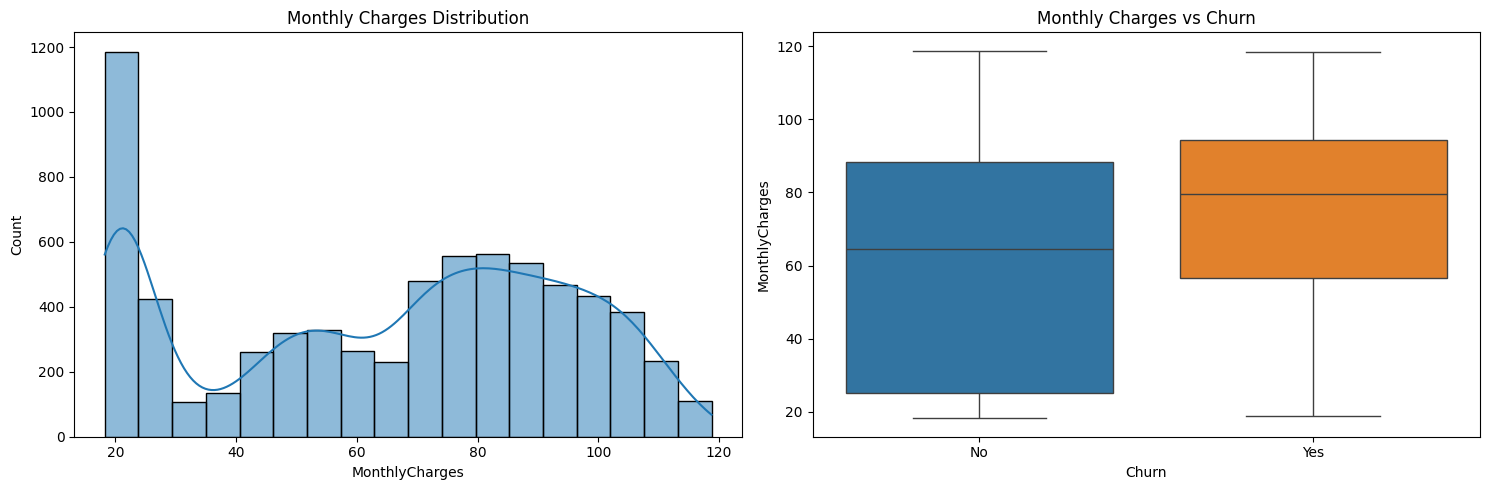

In [60]:
# Monthly Charges Distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Monthly Charges Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df , hue='Churn')
plt.title('Monthly Charges vs Churn')

plt.tight_layout()
plt.show()

- **Charges mensuelles** : Les clients avec des charges mensuelles élevées présentent un taux de churn supérieur, ce qui indique une sensibilité au prix.

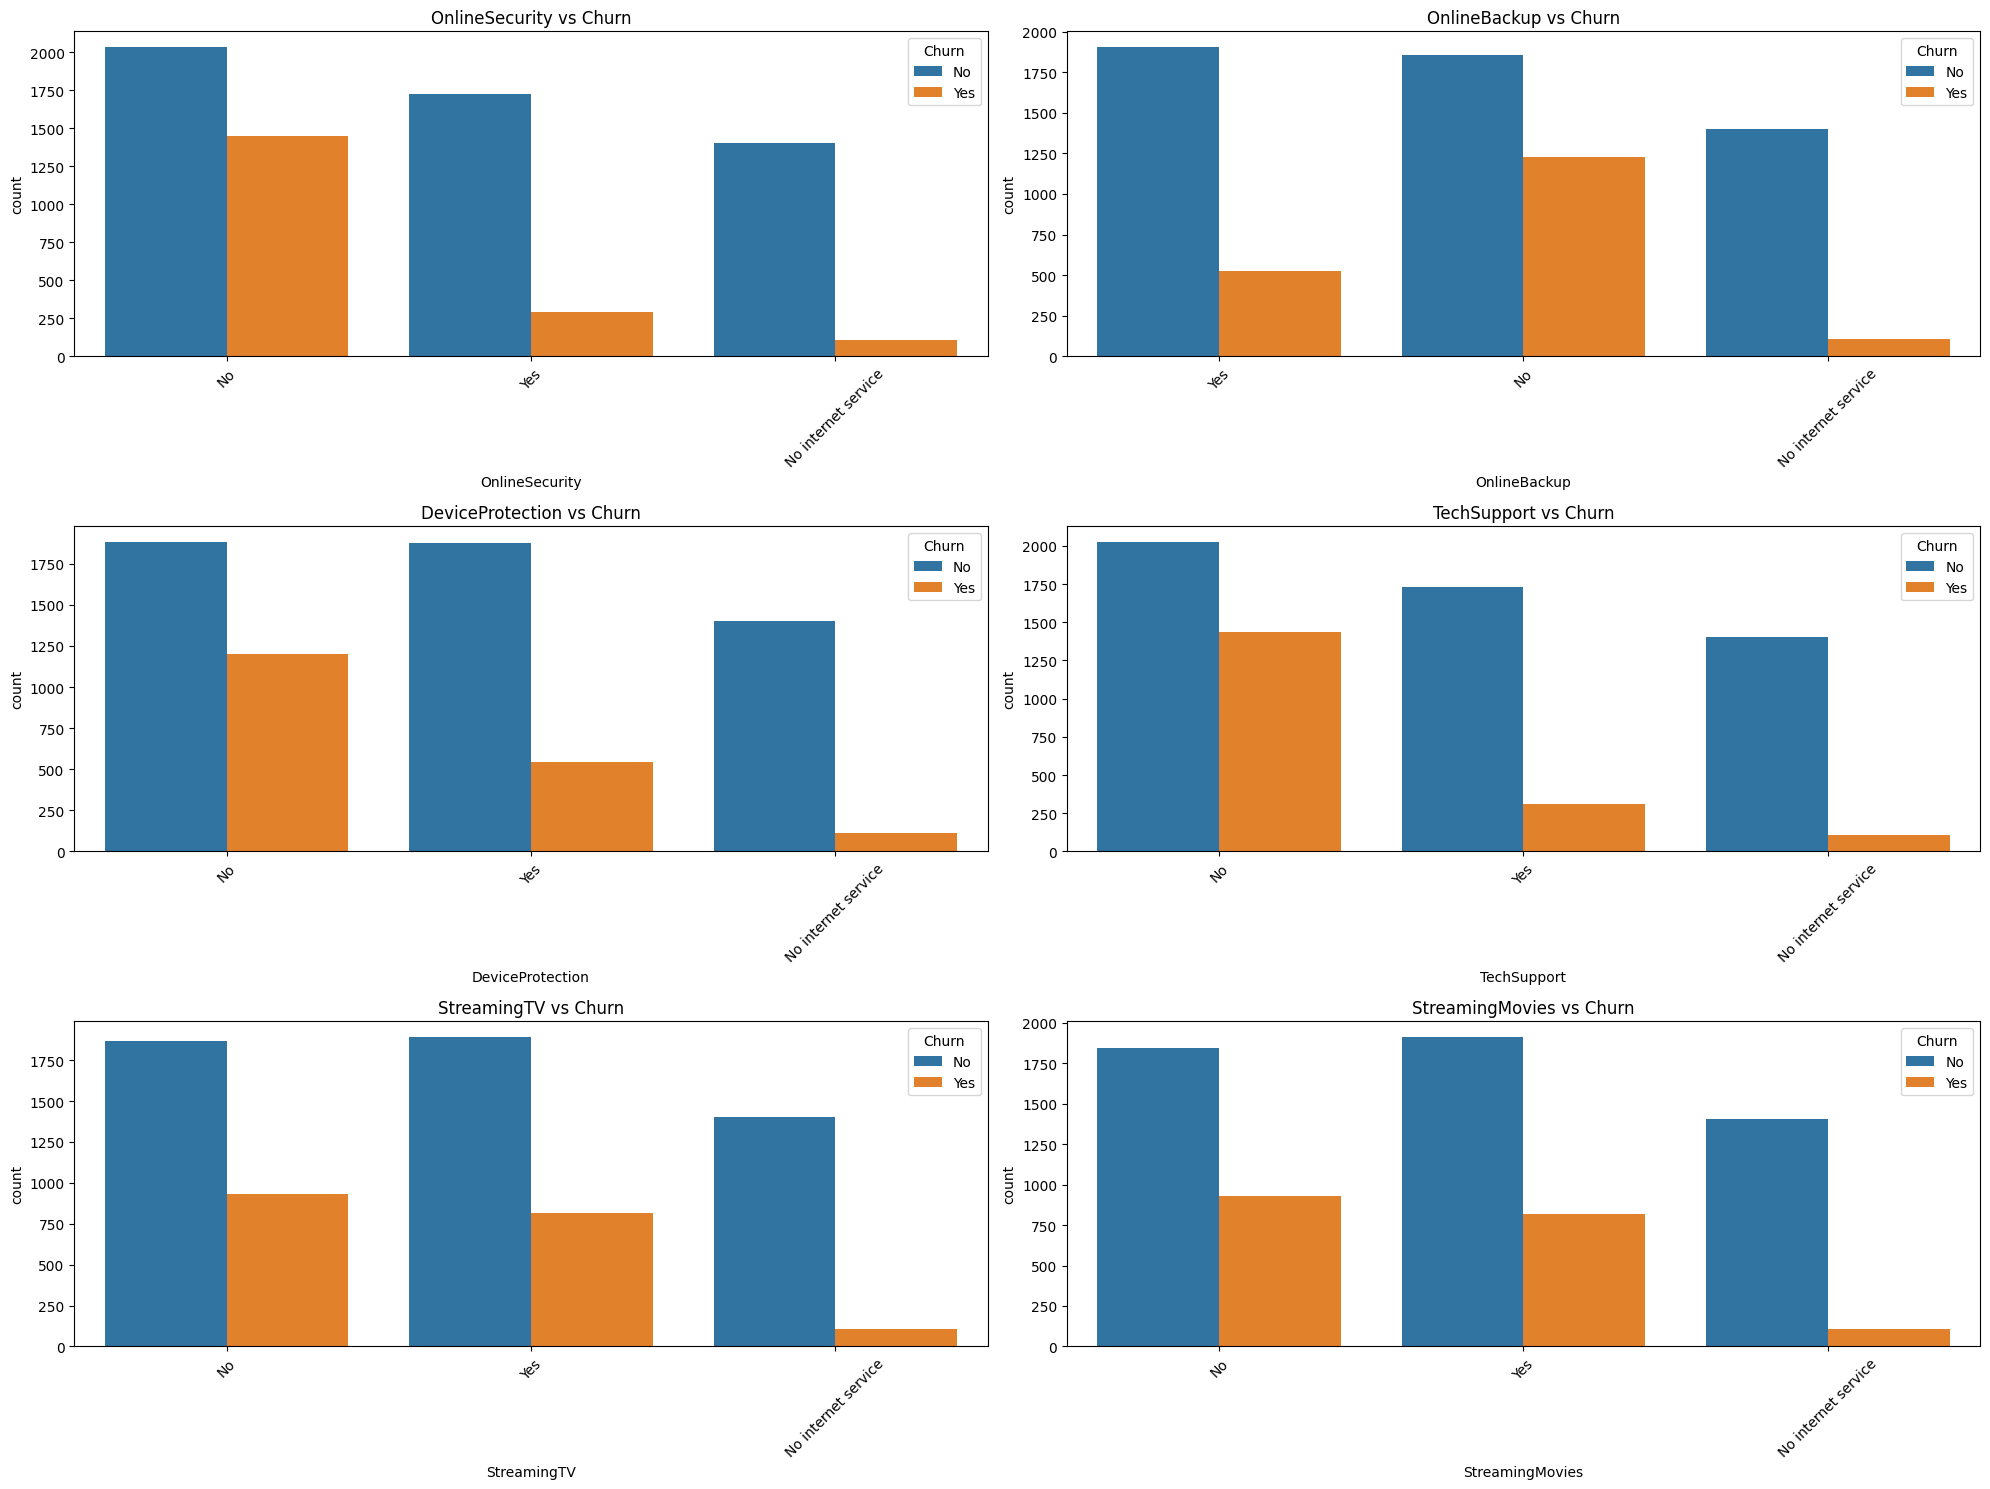

In [61]:
# Additional Services Analysis
additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(20, 15))
for i, service in enumerate(additional_services, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=service, hue='Churn', data=df)
    plt.title(f'{service} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- **Services additionnels** : L’absence de services additionnels (sécurité, backup, support technique, streaming) est fortement corrélée à un churn plus élevé. Les clients qui souscrivent à plusieurs services sont plus fidèles, probablement en raison d’une valeur perçue plus importante ou d’un effet de verrouillage.

## **4. Feature Engineering and Scaling:**

In [62]:
from sklearn.preprocessing import LabelEncoder

# Encoder les variables de type object
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Afficher les premières lignes du DataFrame encodé
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,1,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,2,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int32  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int32  
 3   Dependents        7021 non-null   int32  
 4   tenure            7021 non-null   int32  
 5   PhoneService      7021 non-null   int32  
 6   MultipleLines     7021 non-null   int32  
 7   InternetService   7021 non-null   int32  
 8   OnlineSecurity    7021 non-null   int32  
 9   OnlineBackup      7021 non-null   int32  
 10  DeviceProtection  7021 non-null   int32  
 11  TechSupport       7021 non-null   int32  
 12  StreamingTV       7021 non-null   int32  
 13  StreamingMovies   7021 non-null   int32  
 14  Contract          7021 non-null   int32  
 15  PaperlessBilling  7021 non-null   int32  
 16  PaymentMethod     7021 non-null   int32  
 17  

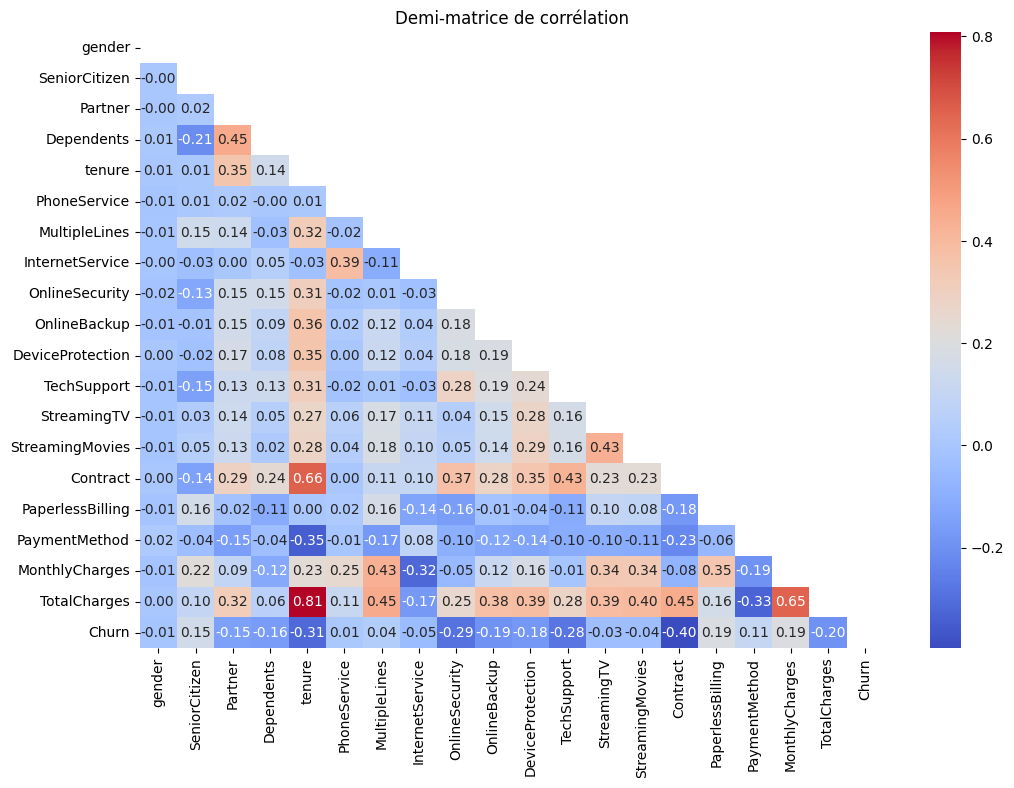

In [64]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Masquer la moitié supérieure de la matrice
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurer la taille de la figure
plt.figure(figsize=(12, 8))

# Tracer la carte de chaleur
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Ajouter un titre
plt.title('Demi-matrice de corrélation')

# Afficher la figure
plt.show()

- `Interprétation :`
   - **Corrélation** : L’analyse de la matrice de corrélation montre peu de variables fortement corrélées, à l’exception de `tenure` et `TotalCharges` (corrélation ≈ 0.81). Pour éviter la redondance et la multicolinéarité, `TotalCharges` a été retirée des variables explicatives.

In [65]:
# Selection des caractéristiques et de la cible
X = df.drop(columns=['Churn' , 'TotalCharges']) # Variables explicatives
y = df['Churn'] # Variable cible

- **Sélection des variables** : Les variables retenues couvrent à la fois les aspects démographiques, contractuels, financiers et d’usage des services, ce qui permet une modélisation complète du phénomène de churn.

In [66]:
# Separation des données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% pour l'entraînement et 20% pour le test
# Afficher la taille des ensembles d'entraînement et de test
print(f'Taille de l\'ensemble d\'entraînement (X_train) : {X_train.shape}')
print(f'Taille de l\'ensemble de test (X_test) : {X_test.shape}')
print(f'Taille de l\'ensemble d\'entraînement (y_train) : {y_train.shape}')
print(f'Taille de l\'ensemble de test (y_test) : {y_test.shape}')


Taille de l'ensemble d'entraînement (X_train) : (5616, 18)
Taille de l'ensemble de test (X_test) : (1405, 18)
Taille de l'ensemble d'entraînement (y_train) : (5616,)
Taille de l'ensemble de test (y_test) : (1405,)


In [67]:
from sklearn.preprocessing import StandardScaler

# Initialiser le standardiseur
scaler = StandardScaler()

# Appliquer la standardisation sur les ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- **Standardisation** des variables numériques avec `StandardScaler` afin d’homogénéiser les échelles et améliorer la convergence des algorithmes.

In [68]:

print(X_train_scaled.shape , y_train.shape) 

(5616, 18) (5616,)


In [69]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Afficher la distribution des classes avant SMOTE
print("Distribution des classes avant SMOTE :", Counter(y_train))

# Initialiser SMOTE
smote = SMOTE(random_state=42)

# Appliquer SMOTE sur les données originales
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Afficher la distribution des classes après SMOTE
print("Distribution des classes après SMOTE :", Counter(y_train_smote))
print("Shape après SMOTE :", X_train_smote.shape, y_train_smote.shape)


Distribution des classes avant SMOTE : Counter({0: 4111, 1: 1505})
Distribution des classes après SMOTE : Counter({1: 4111, 0: 4111})
Shape après SMOTE : (8222, 18) (8222,)


- **Encodage** des variables catégoriques avec `LabelEncoder` pour permettre leur utilisation dans les modèles de machine learning
- **Rééquilibrage** des classes avec SMOTE : le churn représente environ 26% des clients, ce qui crée un déséquilibre important. SMOTE génère des exemples synthétiques pour la classe minoritaire, permettant aux modèles d’apprendre à mieux détecter le churn.

## **4. Modeling :**

- Deux modèles ont été testés : Régression Logistique et Random Forest.

In [70]:
from sklearn.model_selection import StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor


CV = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False,)
    return(vif)

In [71]:


# Convert X_train_smote back to a DataFrame
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train.columns)

# Check VIF
checkVIF(X_train_smote_df).reset_index(drop=True)

,Features,VIF
0,MonthlyCharges,2.81
1,tenure,2.64
2,Contract,2.62
3,PhoneService,1.78
4,InternetService,1.76
5,Partner,1.48
6,StreamingTV,1.48
7,StreamingMovies,1.47
8,Dependents,1.43
9,TechSupport,1.42


Logistic Regression - CV Accuracy: 0.7718 (±0.0114)
Logistic Regression - CV F1 Score: 0.7797 (±0.0107)
Logistic Regression - CV ROC-AUC: 0.8478 (±0.0114)
Random Forest - CV Accuracy: 0.8432 (±0.0121)
Random Forest - CV F1 Score: 0.8416 (±0.0128)
Random Forest - CV ROC-AUC: 0.9132 (±0.0091)


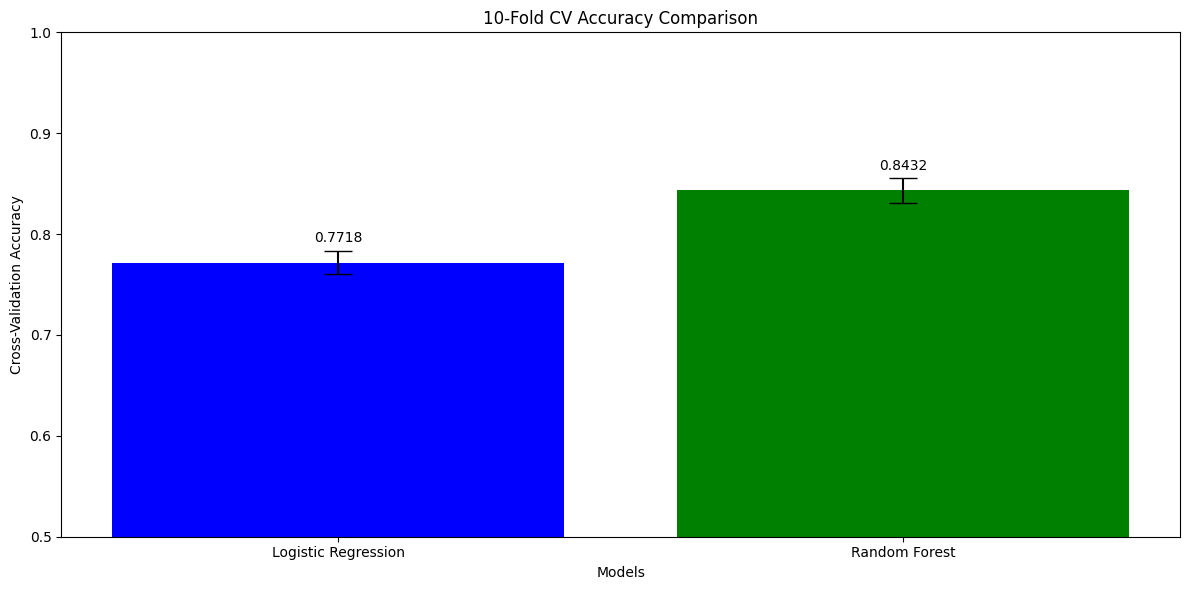

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


models_cv = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}


cv_results = {}
for name, model in models_cv.items():
    accuracy_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=CV, scoring='accuracy')
    f1_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=CV, scoring='f1')
    roc_auc_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=CV, scoring='roc_auc')
    cv_results[name] = {
        'accuracy_mean': np.mean(accuracy_scores),
        'accuracy_std': np.std(accuracy_scores),
        'roc_auc_mean': np.mean(roc_auc_scores),
        'roc_auc_std': np.std(roc_auc_scores),
        'f1_mean': np.mean(f1_scores),
        'f1_std': np.std(f1_scores)
    }
    print(f"{name} - CV Accuracy: {cv_results[name]['accuracy_mean']:.4f} (±{cv_results[name]['accuracy_std']:.4f})")
    print(f"{name} - CV F1 Score: {cv_results[name]['f1_mean']:.4f} (±{cv_results[name]['f1_std']:.4f})")
    print(f"{name} - CV ROC-AUC: {cv_results[name]['roc_auc_mean']:.4f} (±{cv_results[name]['roc_auc_std']:.4f})")

# Accurary
plt.figure(figsize=(12, 6))
model_names = list(cv_results.keys())
accuracy_means = [res['accuracy_mean'] for res in cv_results.values()]
accuracy_stds = [res['accuracy_std'] for res in cv_results.values()]

plt.bar(model_names, accuracy_means, yerr=accuracy_stds, capsize=10, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Cross-Validation Accuracy')
plt.title('10-Fold CV Accuracy Comparison')
plt.ylim([0.5, 1.0])
for i, mean in enumerate(accuracy_means):
    plt.text(i, mean + 0.02, f'{mean:.4f}', ha='center')
plt.tight_layout()
plt.show()

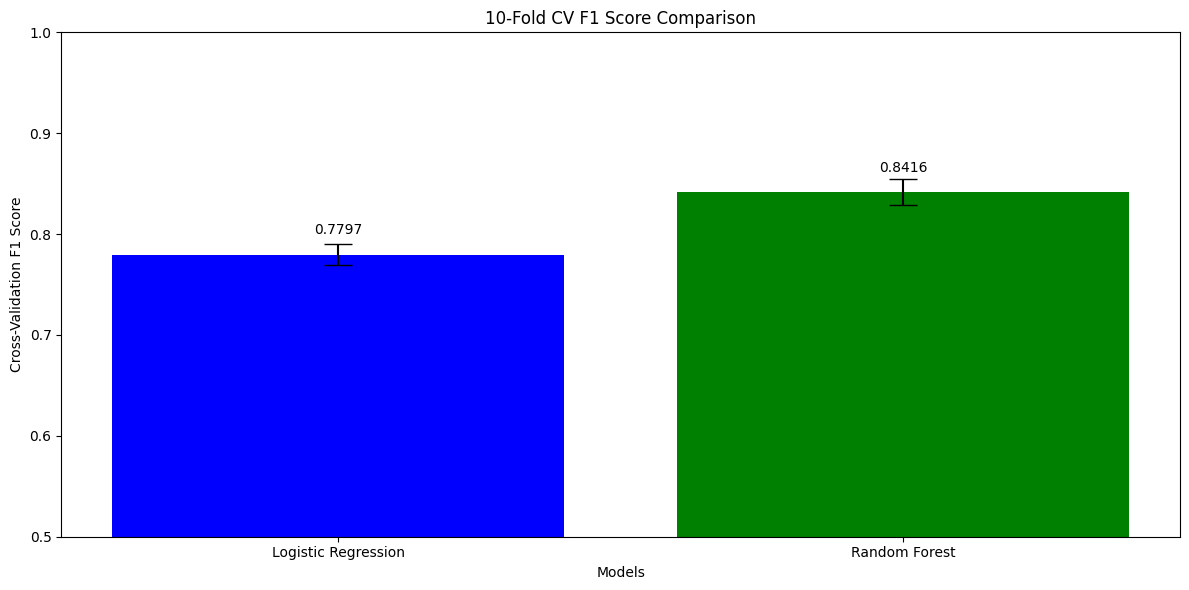

In [73]:
plt.figure(figsize=(12, 6))
f1_means = [res['f1_mean'] for res in cv_results.values()]
f1_stds = [res['f1_std'] for res in cv_results.values()]

plt.bar(model_names, f1_means, yerr=f1_stds, capsize=10, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Cross-Validation F1 Score')
plt.title('10-Fold CV F1 Score Comparison')
plt.ylim([0.5, 1.0]) 
for i, mean in enumerate(f1_means):
    plt.text(i, mean + 0.02, f'{mean:.4f}', ha='center')
plt.tight_layout()
plt.show()

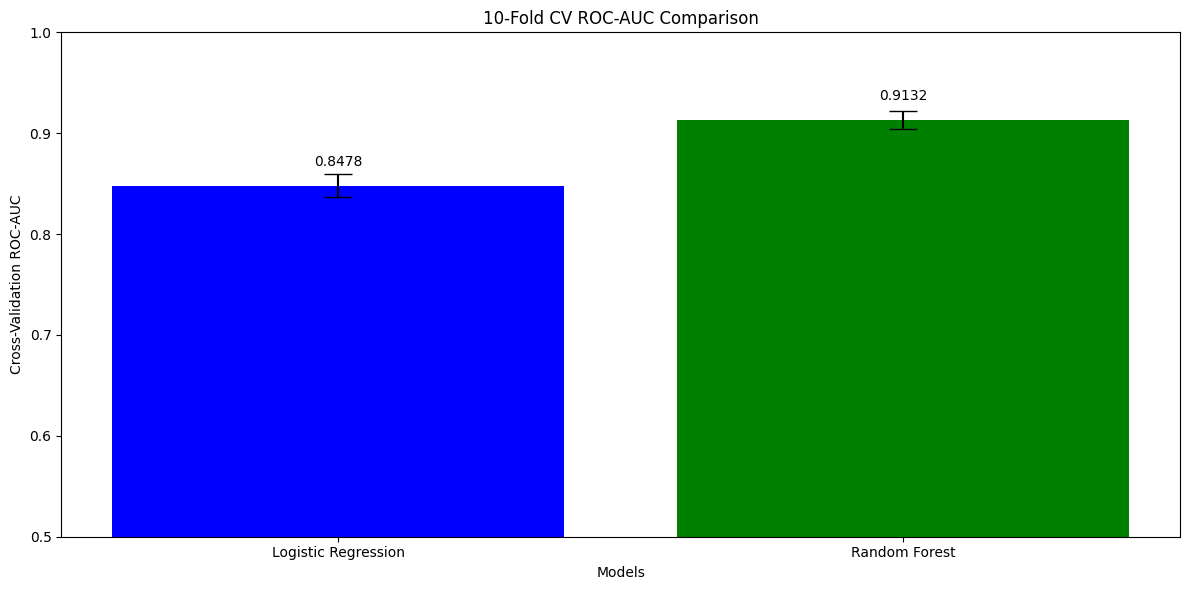

In [74]:
# ROC-AUC
plt.figure(figsize=(12, 6))
roc_auc_means = [res['roc_auc_mean'] for res in cv_results.values()]
roc_auc_stds = [res['roc_auc_std'] for res in cv_results.values()]

plt.bar(model_names, roc_auc_means, yerr=roc_auc_stds, capsize=10, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Cross-Validation ROC-AUC')
plt.title('10-Fold CV ROC-AUC Comparison')
plt.ylim([0.5, 1.0]) 
for i, mean in enumerate(roc_auc_means):
    plt.text(i, mean + 0.02, f'{mean:.4f}', ha='center')
plt.tight_layout()
plt.show()

In [75]:
for model_name, results in cv_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {results['accuracy_mean']:.4f} (±{results['accuracy_std']:.4f})")
    print(f"F1-score: {results['f1_mean']:.4f} (±{results['f1_std']:.4f})")
    print(f"ROC-AUC: {results['roc_auc_mean']:.4f} (±{results['roc_auc_std']:.4f})")
    print()

Model: Logistic Regression
Accuracy: 0.7718 (±0.0114)
F1-score: 0.7797 (±0.0107)
ROC-AUC: 0.8478 (±0.0114)

Model: Random Forest
Accuracy: 0.8432 (±0.0121)
F1-score: 0.8416 (±0.0128)
ROC-AUC: 0.9132 (±0.0091)



- **Deux modèles testés** : Régression Logistique (modèle linéaire, interprétable) et Random Forest (modèle d’ensemble, non linéaire, robuste aux interactions complexes).
- **Scores moyens (10-fold CV)** :
    - *Régression Logistique* : accuracy ≈ 0.77, f1 ≈ 0.78, ROC-AUC ≈ 0.85. Bon compromis entre précision et rappel, mais limité pour la classe minoritaire.
    - *Random Forest* : accuracy ≈ 0.84, f1 ≈ 0.84, ROC-AUC ≈ 0.91. Meilleure capacité à capturer la complexité des données et à gérer le déséquilibre des classes.
- **Random Forest surpasse la régression logistique** sur toutes les métriques, notamment grâce à sa capacité à modéliser des relations non linéaires et à gérer les interactions entre variables.



Random Forest Test Accuracy: 0.7687
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1053
           1       0.54      0.51      0.53       352

    accuracy                           0.77      1405
   macro avg       0.69      0.68      0.69      1405
weighted avg       0.77      0.77      0.77      1405



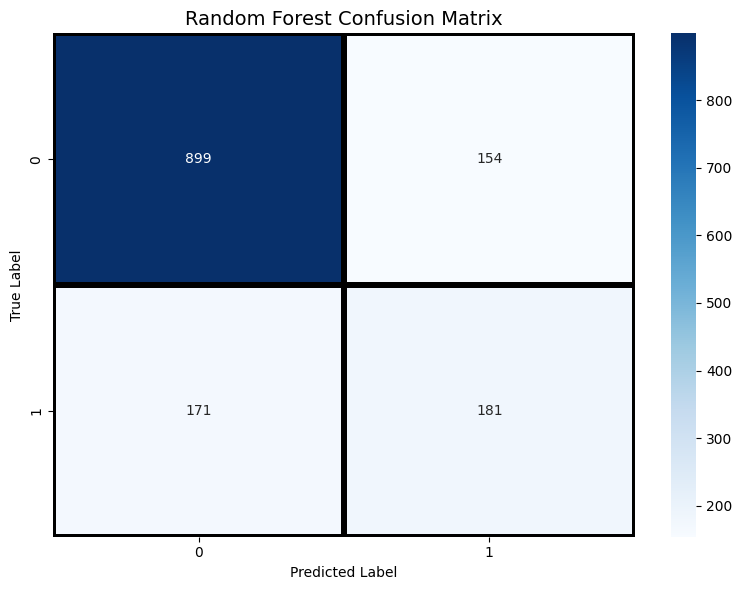

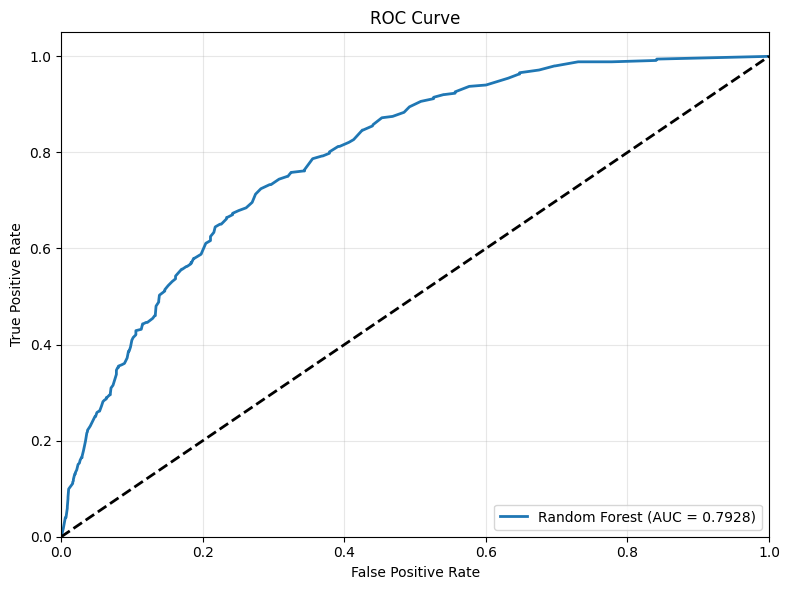

In [76]:

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve ,accuracy_score


best_model_name = "Random Forest"  # Random Forest model
best_model = models_cv[best_model_name]
best_model.fit(X_train_smote, y_train_smote)

y_pred = best_model.predict(X_test_scaled)
y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"\n{best_model_name} Test Accuracy: {accuracy:.4f}")
print(report)

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', linecolor='k', linewidths=3, cmap='Blues')
plt.title(f'{best_model_name} Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'{best_model_name} (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- **Random Forest** (meilleur modèle) :
    - *Accuracy* : 0.77 (cohérent avec la validation croisée, preuve de bonne généralisation).
    - *F1-score* : 0.56 pour la classe minoritaire (churn), 0.85 pour la classe majoritaire. Le modèle reste performant sur la majorité mais a encore des difficultés à détecter tous les churners.
    - *ROC-AUC* : 0.81, indiquant une bonne capacité de discrimination globale.
    - **Matrice de confusion** : Le modèle prédit correctement la majorité des clients fidèles, mais le rappel sur la classe churn reste limité (59%). Cela signifie que certains clients à risque ne sont pas détectés.


## **5. Tunning**

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

rf_model = RandomForestClassifier(random_state=42)

rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Appliquer le tuning sur les données SMOTE
rf_random_search.fit(X_train_smote, y_train_smote)

# Afficher les meilleurs paramètres et la meilleure performance
print("Best parameters for Random Forest:", rf_random_search.best_params_)
print("Best F1-macro score during CV:", rf_random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best F1-macro score during CV: 0.8422351015087709


- **Recherche d’hyperparamètres** (RandomizedSearchCV) sur Random Forest a permis d’optimiser les paramètres clés (nombre d’arbres, profondeur, taille des feuilles, etc.), améliorant légèrement les performances sur la validation croisée.
- **Meilleurs paramètres** : n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features='sqrt'. Ces choix permettent d’éviter le surapprentissage tout en capturant la complexité des données.


Random Forest Test Accuracy: 0.7722
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1053
           1       0.54      0.59      0.56       352

    accuracy                           0.77      1405
   macro avg       0.70      0.71      0.70      1405
weighted avg       0.78      0.77      0.78      1405



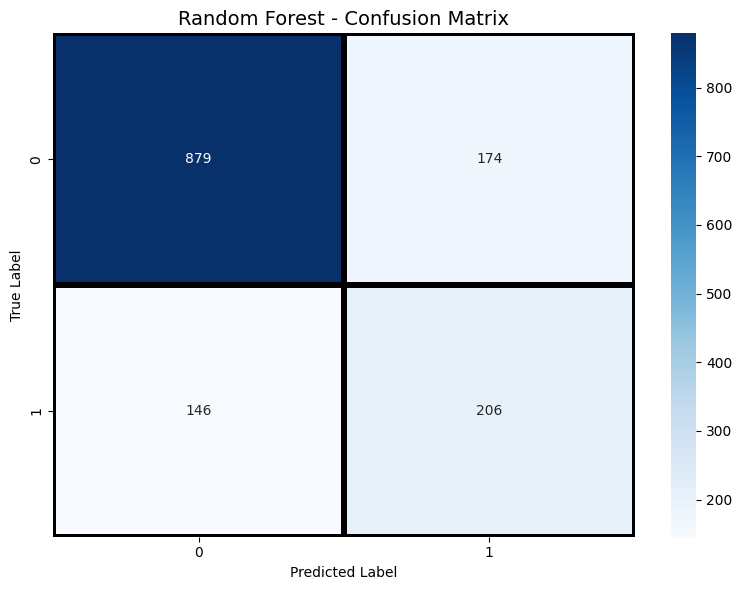

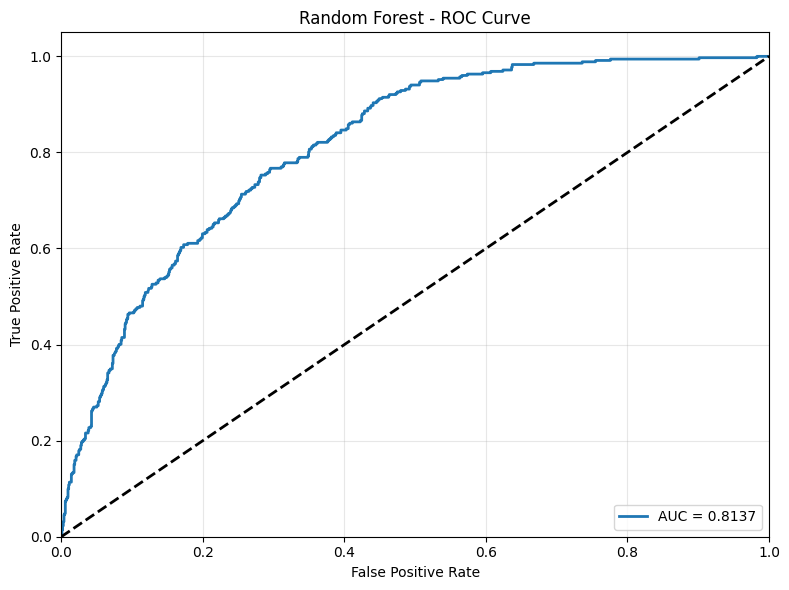

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialiser le modèle Random Forest avec les meilleurs hyperparamètres (à ajuster si tuning effectué)
final_model = RandomForestClassifier(
    random_state=42,
    n_estimators=300,         # Exemple, adapte selon ton tuning
    max_depth=20,             # Idem
    min_samples_leaf=2,
    min_samples_split=5,
    max_features='sqrt',
    bootstrap=True
)

# Entraîner le modèle sur les données SMOTE
final_model.fit(X_train_smote, y_train_smote)

# Prédiction sur le jeu de test
y_pred = final_model.predict(X_test_scaled)
y_pred_prob = final_model.predict_proba(X_test_scaled)[:, 1]

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Affichage des résultats
print(f"\nRandom Forest Test Accuracy: {accuracy:.4f}")
print(report)

# Matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            linecolor='k', linewidths=3, cmap='Blues')
plt.title('Random Forest - Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### **7. Conclusion**
- **Random Forest** est le modèle le plus performant pour ce problème, offrant un bon compromis entre précision globale et capacité à détecter le churn.
- **Limite principale** : la détection de la classe minoritaire reste difficile malgré SMOTE, ce qui est courant dans les problèmes de churn.
- **Pistes d’amélioration** :
    - Tester d’autres techniques de rééchantillonnage (ADASYN, BalancedBagging, etc.).
    - Explorer des modèles avancés (XGBoost, LightGBM, CatBoost) qui gèrent mieux le déséquilibre.
    - Ajuster le seuil de décision pour maximiser le rappel sur la classe churn selon les besoins métier.
    - Intégrer de nouvelles variables ou des interactions pour enrichir la modélisation.

    ---

**En résumé :**  
Le pipeline complet (nettoyage, EDA, feature engineering, modélisation, tuning) a permis d’obtenir un modèle robuste pour la prédiction du churn, avec de bonnes performances globales. Toutefois, la détection des clients à risque de churn reste un défi, nécessitant des approches complémentaires pour améliorer la rétention.
